📌 Trabajo Final de Diplomatura en Inteligencia Artificial - Grupo 6 - Cohorte  2024

# Sistema para la clasificación correcta de residuos.

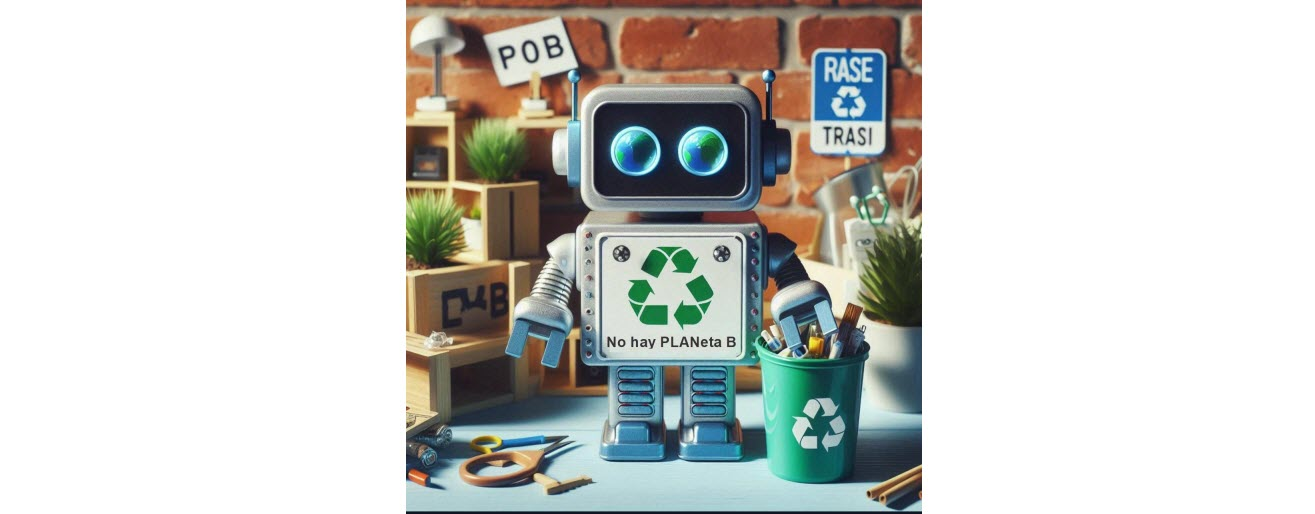

### Integrantes:  
    Valentina Botta  
    Gustavo Lucarella   
    Mauricio Magistocchi   
    Edgardo Eliseo Cornelio  

**🟢 "En este cuaderno, clasificaremos los desechos (trash) o no, utilizando una Red Neuronal Convolucional (CNN - EfficientNet B3).".**

El desperdicio es un problema global significativo. Se están generando volúmenes crecientes de residuos a medida que la población mundial y los estándares de vida aumentan. Las personas están cada vez más preocupadas por la producción de residuos y su efecto, y buscan formas de abordar el problema.

El reciclaje es el proceso de convertir materiales de desecho en nuevos materiales y objetos. La recuperación de energía de los materiales de desecho a menudo se incluye en este concepto. La reciclabilidad de un material depende de su capacidad para recuperar las propiedades que tenía en su estado original. Es una alternativa a la eliminación de residuos "convencional" que puede ahorrar materiales y ayudar a reducir las emisiones de gases de efecto invernadero. El reciclaje puede prevenir el desperdicio de materiales potencialmente útiles y reducir el consumo de materias primas frescas, lo que a su vez disminuye: el uso de energía, la contaminación del aire (por incineración) y la contaminación del agua (por vertederos).

# Preparando el Dataset 📊

Configuración y Preprocesamiento del conjunto de datos de imágenes con PyTorch

Configuramos un conjunto de datos de imágenes para su uso en modelos de aprendizaje profundo, utilizamos la biblioteca PyTorch y su módulo de transformaciones de torchvision. Indicamos la ubicación del conjunto de datos, que debe estar organizado en carpetas según las clases y a continuación, se definen las transformaciones que se aplicarán a las imágenes, como volteos aleatorios, recortes redimensionados y normalización, utilizando valores de media y desviación estándar comunes en modelos preentrenados. Finalmente, se crea un objeto ImageFolder, que carga las imágenes aplicando las transformaciones definidas. Este proceso es crucial para preparar el conjunto de datos y mejorar la capacidad del modelo para generalizar a nuevos datos.

In [1]:
from torchvision.datasets import ImageFolder     # para cargar imágenes organizadas en carpetas según sus clases.
from torch.utils.data import DataLoader          # para crear un iterable sobre el conjunto de datos. 
import torchvision.transforms.v2 as v2           # para aplicar transformaciones a las imágenes (en su versión 2).   
import torch                                     # para cargar la biblioteca principal de PyTorch.
import os                                        # para cargar biblioteca que permite interactuar con el sistema de archivos.

# Se establece la ubicación del conjunto de datos en el sistema de archivos. 
dataset_url = '/mnt/c/Users/edgardo/git-edgardo/Austral/TF-Diplo/DataSet/dataset_splits'
                    
# Obtenemos una lista de los nombres de las clases (subcarpetas) dentro de la carpeta del conjunto de datos.
class_names = sorted([name for name in os.listdir(dataset_url)])

# Se definen los valores de media y desviación estándar para normalizar las imágenes. 
# Estos valores son comunes para modelos preentrenados en el conjunto de datos ImageNet.
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

# Creamos una secuencia de transformaciones que se aplicarán a las imágenes del conjunto de datos:
transformations = v2.Compose([
    v2.ToImage(),                                            # Convierte la entrada a un objeto de imagen.
    v2.RandomHorizontalFlip(),                               # Aplica un volteo horizontal aleatorio a las imágenes.
    v2.RandomVerticalFlip(),                                 # Aplica un volteo vertical aleatorio a las imágenes.
    v2.RandomResizedCrop(size=(224, 224), antialias=True),   # Corta aleatoriamente un área de la imagen redimensionándola a 224x224 píxeles.
    v2.RandomRotation(degrees = (0, 170)),                   # Rota aleatoriamente las imágenes entre 0 y 170 grados.
    v2.ToDtype(dtype = torch.float32, scale = True),         # Convierte las imágenes al tipo de dato float32 y escala los valores de píxel.
    #v2.Resize(size = (384, 384), antialias = True),         # 
    v2.Normalize(mean, std)                                  # Normaliza las imágenes utilizando los valores de media y desviación estándar definidos anteriormente.
])

# Creamos un objeto ImageFolder que carga las imágenes desde la ruta especificada (dataset_url), aplicando las transformaciones definidas anteriormente.
# ImageFolder espera que las imágenes estén organizadas en subcarpetas, donde cada subcarpeta representa una clase.
dataset = ImageFolder(dataset_url, transform = transformations)

In [9]:
#!pip install torchvision

# Dividiendo el conjunto de datos 🖖

In [2]:
from torch.utils.data import random_split

# Divide el conjunto de datos original (dataset) en tres subconjuntos:
#    train_dataset: Para entrenamiento, con el 90% de los datos.
#    valid_dataset: Para validación, con el 5% de los datos.
#    test_dataset: Para pruebas, con el 5% restante de los datos.
    
train_size = int(len(dataset) * 0.90)
valid_size = int(len(dataset) * 0.05)
test_size = len(dataset) - train_size - valid_size

batch_size = 64  # Tamaño del lote en 64 muestras. los datos se procesarán en grupos de 64 imágenes a la vez durante el entrenamiento y la evaluación.

# Divide el conjunto de datos original (dataset) en tres subconjuntos
train_dataset, valid_dataset, test_dataset = random_split(dataset, [train_size, valid_size, test_size])

# Los DataLoader permiten cargar los datos de manera eficiente durante el entrenamiento y la validación.
# shuffle=True: Mezcla los datos en cada época para evitar el sobreajuste.
# Se crean los DataLoader para cada conjunto: 
#    train_dataset-Datos de entrenamiento, valid_dataset-Datos de validación, test_dataset-Datos de prueba.
train_dataset = DataLoader(train_dataset, shuffle = True, batch_size = batch_size)
valid_dataset = DataLoader(valid_dataset, shuffle = True, batch_size = batch_size)
test_dataset = DataLoader(test_dataset, shuffle = True, batch_size = batch_size)

# Imprime la cantidad de ejemplos en cada subconjunto (entrenamiento, validación y prueba).
print(f'Length of training dataset: {len(train_dataset.dataset)}')
print(f'Length of validating dataset: {len(valid_dataset.dataset)}')
print(f'Length of testing dataset: {len(test_dataset.dataset)}')

Length of training dataset: 6984
Length of validating dataset: 388
Length of testing dataset: 389


# Visualización de una Imagen de Entrenamiento con su Etiqueta 🖼️

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7981834146976471..1.3314285869598388].


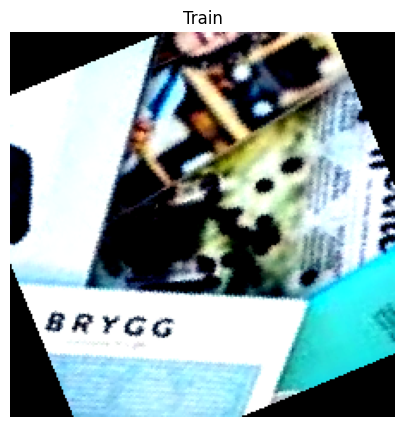

In [3]:
import matplotlib.pyplot as plt   # Se importa la biblioteca para la visualización de imágenes.
import numpy as np                # Se importa la biblioteca para operaciones numéricas, como la manipulación de arrays.


for img, label in train_dataset:   # Se itera sobre el conjunto de datos de entrenamiento (train_dataset), obteniendo pares de imágenes (img) y etiquetas (label).

    image = np.transpose(np.array(img[0]), (2, 1, 0)) # La imagen que se extrae de img está en formato tensor (PyTorch). 
                                                      # Esta operación reorganiza los ejes del array de la imagen 
                                                      # (que tiene forma (C, H, W) —Canales, Altura, Ancho—) a formato (Altura, Ancho, Canales), que es 
                                                      # el formato que matplotlib espera para mostrar la imagen.
     
    image = image * mean + std  # Normaliza la imagen usando los valores de la media y la desviación estándar para deshacer cualquier 
                                # preprocesamiento de normalización que se haya aplicado previamente, restaurando la imagen a su formato original.
    
    plt.figure(figsize = (5,5))  # Define el tamaño de la figura para la imagen que se mostrará.
    plt.imshow(image)  # Muestra la imagen.
    plt.title(class_names[label[0].item()].capitalize()) # Se obtiene la clase correspondiente a la etiqueta de la imagen
    plt.axis('off') # Oculta los ejes.
    plt.show()  # Muestra la imagen con su título.
    break       # En este caso, solo se muestra la primera imagen y etiqueta porque el ciclo termina con break después de la primera iteración.

## Configuración de un Modelo EfficientNet B3 Preentrenado para Clasificación de Imágenes 🎬

Se implementa la creación y personalización de un modelo de red neuronal EfficientNet B3 utilizando la biblioteca timm en PyTorch. Primero, se importa la biblioteca necesaria y se verifica su instalación. Luego, se crea el modelo EfficientNet B3 con pesos preentrenados en ImageNet. Se adapta la capa de salida del modelo para que coincida con el número de clases en el conjunto de datos específico. Además, se congela el 25% de las capas del modelo para evitar su actualización durante el entrenamiento, facilitando así la transferencia de aprendizaje. Finalmente, se configuran los hiperparámetros, incluyendo la tasa de aprendizaje, el número de épocas y la regularización de peso, listos para el proceso de entrenamiento.

In [4]:
import torch.nn as nn  # Importa el módulo nn de PyTorch, que contiene clases y funciones para construir redes neuronales.

try: import timm  # meneja el error si no esta instalado timm       
except ModuleNotFoundError:
    !pip install timm

import timm       # Importa la biblioteca timm (si está disponible), que proporciona modelos preentrenados y arquitecturas de redes.

model = timm.create_model('efficientnet_b3.ra2_in1k', pretrained = True) # Crea un modelo de EfficientNet B3, utilizando pesos preentrenados
                                                                         # en el conjunto de datos ImageNet.

num_classes = len(class_names)   # Obtiene el número de clases en el conjunto de datos (basado en las clases definidas en class_names).
num_features = model.classifier.in_features # Obtiene el número de características de entrada para la capa clasificadora del modelo.

model.head = nn.Linear(num_features, num_classes) # Reemplaza la cabeza del modelo con una nueva capa densa (Linear) que tiene tantas neuronas como clases en el problema de clasificación.

num_layers = len(list(model.parameters())) # Calcula el número total de capas en el modelo.
num_to_freeze = int(num_layers * 0.25)  # Calcula el número de capas que se congelarán (25% de las capas).

# El bucle for congela los parámetros de las primeras 25% de las capas, estableciendo parameter.requires_grad = False, lo que 
# significa que esos parámetros no se actualizarán durante el entrenamiento.
for i, parameter in enumerate(model.parameters()):
    if i < num_to_freeze:
        parameter.requires_grad = False

# Configuración de hiperparámetros:
lr = 0.003  # Establece la tasa de aprendizaje (learning rate).
epochs = 8  # Define el número de épocas para el entrenamiento.
wd = 0.001  # Establece el valor de la regularización de peso (weight decay).

## Entrenamiento y Validación de un Modelo de Aprendizaje Profundo con PyTorch 🦾

Implementamos un ciclo completo de entrenamiento y validación para un modelo de aprendizaje profundo utilizando la biblioteca PyTorch. Definimos una función fit que entrena el modelo en un conjunto de datos de entrenamiento y evalúa su rendimiento en un conjunto de datos de validación durante un número específico de épocas.

El proceso incluye la configuración del dispositivo (GPU o CPU), la definición de la función de pérdida y el optimizador. Durante cada época, se calcula la pérdida y la precisión tanto en el conjunto de entrenamiento como en el de validación. Los resultados se presentan en tiempo real utilizando pandas para una visualización clara del progreso del entrenamiento. Este enfoque permite ajustar el modelo de manera efectiva y monitorizar su rendimiento en cada etapa del proceso de entrenamiento.

In [5]:
from IPython.display import clear_output, display #  Importa clear_output y display de la biblioteca IPython para limpiar la salida y mostrar datos en Jupyter Notebooks.
import pandas as pd  # Importa la biblioteca pandas como pd, que se utilizará para manejar y mostrar datos en forma de DataFrame.
import torch # Importa la biblioteca principal de PyTorch para trabajar con tensores y modelos de aprendizaje profundo.

device = 'cuda' if torch.cuda.is_available() else 'cpu' # Asigna device a 'cuda' si hay una GPU disponible; de lo contrario, asigna 'cpu'. 
                                                        # Esto permite que el modelo use la GPU si está disponible, mejorando el rendimiento.

# Establece criterion como la función de pérdida de entropía cruzada, que es adecuada para problemas de clasificación.
criterion = torch.nn.CrossEntropyLoss() 

# Crea un optimizador AdamW para actualizar los parámetros del modelo. filter(lambda p: p.requires_grad, model.parameters()) asegura que
# solo se optimicen los parámetros que requieren gradientes. lr y wd son la tasa de aprendizaje y la regularización por peso, respectivamente.
optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr = lr, weight_decay = wd)


# Declara la función fit que entrena el modelo en un conjunto de datos de entrenamiento y lo evalúa en un conjunto de validación.
def fit(train_dataset, valid_dataset, model, epochs): 

    # Crea una lista data para almacenar estadísticas de cada época y define columns con los nombres de las columnas que se mostrarán en el DataFrame.
    data = []
    columns = ["Epoch", "Train Loss", "Train Accuracy", "Validation Loss", "Validation Accuracy"]

    # rea una lista dataframe para almacenar resultados de cada época.
    dataframe = []
    
    model.to(device)  # Mueve el modelo al dispositivo definido (GPU o CPU).

    # Inicia un bucle que itera a través del número de épocas especificadas.
    for epoch in range(epochs):  
        
        model.train() # Establece el modelo en modo de entrenamiento, lo que permite el cálculo de gradientes.
        train_total, train_correct, train_loss = 0,0,0 # Inicializa contadores para el total de ejemplos de entrenamiento, la cantidad correcta y la pérdida total.

        #Itera a través del conjunto de datos de entrenamiento, obteniendo imágenes y etiquetas.
        for i, (images, labels) in enumerate(train_dataset):
            # Mueve las imágenes y las etiquetas al dispositivo definido.
            images = images.to(device)
            labels = labels.to(device)

            # Pasa las imágenes a través del modelo para obtener las predicciones.
            outputs = model(images)

            # Calcula la pérdida entre las predicciones del modelo y las etiquetas reales utilizando la función de pérdida definida.
            loss = criterion(outputs, labels)

            # Establece los gradientes de todos los parámetros a cero antes de realizar la retropropagación.
            optimizer.zero_grad()

            # Calcula los gradientes de la pérdida con respecto a los parámetros del modelo.
            loss.backward()

            #  Actualiza los parámetros del modelo utilizando los gradientes calculados.
            optimizer.step()

            # Obtiene las predicciones del modelo tomando el índice del valor máximo de las salidas.
            _ , predicted = torch.max(outputs.data, 1)

            # Suma la pérdida actual a la pérdida total de entrenamiento.
            train_loss += loss.item()

            # Incrementa el total de ejemplos de entrenamiento con el tamaño del lote actual.
            train_total += labels.size(0)

            # Suma el número de predicciones correctas.
            train_correct += (predicted == labels).sum().item()

            # Calcula la pérdida promedio de entrenamiento hasta el momento.
            avg_train_loss = train_loss / (i+1)
            # Calcula la precisión de entrenamiento como un porcentaje.
            train_accuracy = 100 * train_correct / train_total

            # Limpia la salida del notebook para actualizar la información de progreso en cada época.
            clear_output(wait = True)
            # Imprime el número de época, la precisión de entrenamiento y la pérdida promedio de entrenamiento.
            print(f"Epoch: {epoch + 1}, Train Accuracy: {train_accuracy:.2f}%, Train Loss: {avg_train_loss:.2f}")

        # Inicia un bloque donde los gradientes no serán calculados, ya que no se requiere retropropagación.    
        with torch.no_grad():

            # Establece el modelo en modo de evaluación, desactivando el cálculo de gradientes.
            model.eval()  

            # Inicializa contadores para el total de ejemplos de validación, la cantidad correcta y la pérdida total de validación.
            total, correct, validation_loss = 0,0,0  

            
            for i, (images, labels) in enumerate(valid_dataset):      # tera a través del conjunto de datos de validación.
                
                # Mueve las imágenes y las etiquetas al dispositivo definido.
                images = images.to(device)
                labels = labels.to(device)

                # Pasa las imágenes a través del modelo para obtener las predicciones.
                outputs = model(images)

                # Calcula la pérdida entre las predicciones del modelo y las etiquetas reales para el conjunto de validación.
                loss = criterion(outputs, labels)


                # Obtiene las predicciones del modelo para el conjunto de validación.
                _ , prediction = torch.max(outputs.data, 1)
                # Suma la pérdida actual a la pérdida total de validación.
                validation_loss += loss.item()

                # Incrementa el total de ejemplos de validación con el tamaño del lote actual.
                total += labels.size(0)
                # Suma el número de predicciones correctas para el conjunto de validación.
                correct += (prediction == labels).sum().item()

                # Calcula la pérdida promedio de validación hasta el momento.
                avg_validation_loss = validation_loss / (i + 1)
                # Calcula la precisión de validación como un porcentaje.
                accuracy = 100 * correct / total
                

                #  Agrega las métricas de la época actual a la lista data.
                data.append([epoch + 1, avg_train_loss, train_accuracy, avg_validation_loss, accuracy])
                # Crea un DataFrame de pandas con los datos registrados.
                df = pd.DataFrame(data, columns = columns)
                
                # Limpia la salida del notebook para mostrar las métricas actualizadas.
                clear_output(wait = True)
                # Muestra la última fila del DataFrame, que contiene las métricas de la época actual.
                display(df.tail(1))

        # Agrega las métricas de la época actual a la lista dataframe.
        dataframe.append([epoch + 1, avg_train_loss, train_accuracy, avg_validation_loss, accuracy])
        # Crea un DataFrame final con todas las métricas de cada época.
        dataf = pd.DataFrame(dataframe, columns = columns)
        # Limpia la salida del notebook para mostrar las métricas actualizadas.
        clear_output(wait = True)
        # Muestra la última fila del DataFrame, que contiene las métricas de la época actual.
        display(dataf)

# Llama a la función fit con los datos de entrenamiento, validación, el modelo y el número de épocas especificado.
fit(train_dataset, valid_dataset, model, epochs)

,Epoch,Train Loss,Train Accuracy,Validation Loss,Validation Accuracy
0,1,0.380943,89.977090,0.238397,89.432990
1,2,0.242721,91.638030,0.233327,88.917526
2,3,0.222131,91.595074,0.235060,89.948454
3,4,0.214339,91.537801,0.212812,89.948454
4,5,0.206225,91.351661,0.264830,87.628866
5,6,0.207710,91.451890,0.186973,89.948454
6,7,0.205067,91.595074,0.200368,89.948454
7,8,0.208870,91.738259,0.211431,89.432990


# Evaluación del Modelo en el Conjunto de Prueba 🔎

Este código evalúa el rendimiento de un modelo de aprendizaje profundo sobre un conjunto de datos de prueba. A lo largo del proceso:

    Se desactiva el cálculo de gradientes para ahorrar memoria y mejorar la eficiencia.
    El modelo se coloca en modo de evaluación para asegurar un comportamiento correcto de las capas como dropout o batch normalization.
    Las predicciones se obtienen pasando las imágenes del conjunto de prueba a través del modelo.
    Se calcula la pérdida utilizando la función de pérdida previamente definida (por ejemplo, entropía cruzada).
    Se mide la precisión del modelo comparando las predicciones con las etiquetas verdaderas.
    Los resultados se muestran de manera iterativa con la precisión y la pérdida promedio acumulada hasta el momento.

In [6]:
# Se inicializan en cero para llevar un registro del total de muestras, el número de predicciones correctas, y la pérdida total acumulada
# durante el proceso de prueba.
total, correct, test_loss = 0,0,0

# Desactiva el cálculo de gradientes ya que no es necesario durante la fase de prueba (esto reduce el uso de memoria y mejora la eficiencia).
with torch.no_grad():

    # Configura el modelo en modo de evaluación, lo que asegura que las capas de dropout o batch normalization (si las hay) se comporten adecuadamente.
    model.eval()        

    # Cada iteración toma un lote de imágenes y etiquetas
    
    for i, (images, labels) in enumerate(test_dataset):
        # images y labels se pasan al dispositivo que está usando PyTorch (CPU o GPU).
        images = images.to(device)
        labels = labels.to(device)

        # Las imágenes pasan a través del modelo para obtener las predicciones (outputs).
        outputs = model(images)
        # Se calcula la pérdida (loss) comparando las predicciones del modelo con las etiquetas verdaderas usando la función 
        # de pérdida definida previamente (por ejemplo, CrossEntropyLoss).
        # # Establece criterion como la función de pérdida de entropía cruzada,
        loss = criterion(outputs, labels)

        # Se selecciona la clase con la mayor probabilidad para cada predicción.
        _ , prediction = torch.max(outputs.data, 1)
        # Se cuenta cuántas predicciones fueron correctas comparando con las etiquetas reales.
        test_loss += loss.item()

        # Se acumula la pérdida para calcular el promedio al final.
        total += labels.size(0)
        # Se incrementa el total de muestras procesadas.
        correct += (prediction == labels).sum().item()

        # Se calcula la pérdida media dividiendo la pérdida total por el número de lotes procesados.
        avg_test_loss = test_loss / (i + 1)
        # Se calcula la precisión dividiendo el número de predicciones correctas entre el número total de muestras, multiplicado por 100.
        accuracy = 100 * correct / total

        # Limpia la salida anterior para actualizar la información de precisión y pérdida en cada iteración.
        clear_output(wait = True)
        # Se imprimen la precisión y la pérdida acumuladas hasta el momento.
        print(f'Test Accuracy: {accuracy:.2f}%, Test Loss: {avg_test_loss:.2f}')

Test Accuracy: 89.20%, Test Loss: 0.21


# Guardando el modelo 🎓

In [7]:
torch.save(model, '/mnt/c/Users/edgardo/git-edgardo/Austral/TF-Diplo/Pytorch/model_NoHayPlanetaB.pt')